In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

       time         0         1    2             3         4  Unnamed: 6
4995  49.95  0.998611  0.999985  0.0  1.600000e-14  0.002271         NaN
4996  49.96  0.998613  0.999985  0.0  1.590000e-14  0.002268         NaN
4997  49.97  0.998615  0.999985  0.0  1.590000e-14  0.002265         NaN
4998  49.98  0.998617  0.999985  0.0  1.580000e-14  0.002263         NaN
4999  49.99  0.998618  0.999985  0.0  1.580000e-14  0.002260         NaN


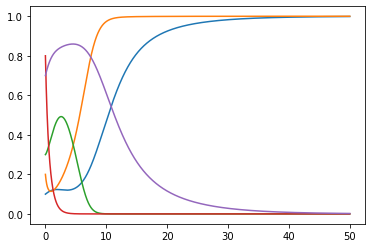

In [3]:
df = pd.read_csv('../data/glv_run.csv')
print(df.tail())
plt.plot(df['time'], df['0'])
plt.plot(df['time'], df['1'])
plt.plot(df['time'], df['2'])
plt.plot(df['time'], df['3'])
plt.plot(df['time'], df['4'])
plt.show()